# 개요

도시공학적 측면에서 데이터를 기반으로 접근할 때 공간데이터(지리정보데이터)를 다뤄야 할 때가 많다.  


**GIS(Geospatial Information System)**란, 우리가 흔히 하는 데이터가 위치에 대한 정보를 갖고 있는 것이라고 할 수 있는데 도시의 건축물 좌표(Point)나, 도로(Line), 시군구 법정동에 해당하는 영역(Polygon)이 될 수 있다.  


**도시 공간이라는 것은 단순히 수치적으로 파악하는 것 외에도, 지리적 위치에 따라 다른 시각으로 접근할 수 있기 때문에 공간데이터를 이해하는 것이 상당히 중요하다.**  


예를들어 서울특별시의 읍면동별 각종 통계자료를 갖고 있다면, 단순히 읍면동별 차이만 보는 것 보다 지도에 mapping하여 인접한 읍면동이 어디인지(지리적 인접성), 주로 어떤 구에서 어떤 특징이 관찰되는지(시장성)를 같이 확인할 수 있다면 더 나은 인사이트를 도출 할 수 있을 것이다.   

## GIS data

이렇게 위치정보를 포함하고 있는 데이터는 크게 **Vector**와 **Raster**의 Raster는 우리가 흔히 아는 이미지 형태의 데이터 이고, Vector는 대표적인 세 가지 유형의 데이터가 있다.  

![png](image/vector_raster.png){: .align-center}{: width="50%" height="50%"}  

출처 : [Robinson_Mugo's publication](https://www.researchgate.net/figure/A-graphic-representation-of-the-core-GIS-data-types-vector-point-line-and-polygon-and_fig2_255850776)

1. Point(점) : 주로 어떤 도시기반시설, 건물, 교차로(node) 등을 나타낼 때 사용한다.  
2. Line(선) : 주로 도로, 경로, 네트워크, 어떤 면의 중심선, 철도 등을 나타낼 때 사용한다.  
3. Polygon(다각형) : 주로 어떤 지역, 군, 영역등을 나타낼 때 사용한다.   

## Tool

툴의 경우에는 개인마다 차이가 있겠지만, 내 경우에는 주로 QGIS와 Python을 활용하는 편이다.  
1. QGIS : 가장 초기에 지도에 뿌려 공간마다 시각적으로 확인해보는 EDA과정이나, 모든 과정이 끝난 후 결과물을 시각화 하여 레포트를 작성하는데 사용한다.  
2. Python : 공간 데이터 전처리, 분석, 시뮬레이션 등 거의 모든 프로세스에 활용이 가능하고 특히 geopandas, networkx, shapely, finona 등 편리한 라이브러리가 많이 나와있어 유용하게 사용하고 있다.  

# Python    

geopandas는 pandas와 유사한 라이브러리로, 공간정보를 가진 데이터프레임을 다루는데 유용한 패키지로 가장많이 활용한다.  
pandas와 마찬가지로 `GeoSeries`, `GeoDataFrame`의 타입으로 다루며 function이나 attribute들도 큰 차이가 없다.  

## 1. 공간 데이터 생성  

Geopandas는 내부적으로 `shapely`라는 패키지를 사용하여 공간 정보를 처리한다.  
이 패키지에는 위에서 말했던 세가지 Vector 타입이 있으며, 추가적으로 MultiPolygon, MultiLinestring 등의 타입들이 있으나 추후에 설명하기로 한다.  

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

다음과 같이 xy평면에 4개의 좌표를 정의해 보자.  

In [9]:
x1 ,y1 = 1,2
x2, y2 = 2,2
x3, y3 = 2,3
x4, y4 = 1,3

당연한 얘기지만, 점은 1개, 선은 2개, 다각형은 3개 이상의 좌표가 필요하며 다음과 같이 생성할 수 있다.  

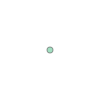

In [50]:
Point([x1,y1])

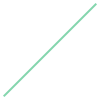

In [51]:
LineString([(x1,y1),(x3,y3)])

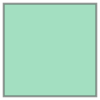

In [52]:
Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

**주의할 점은 Polygon의 좌표들에는 순서가 존재한다는 것이다.**

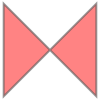

In [53]:
Polygon(sorted([(x1,y1),(x2,y2),(x4,y4),(x3,y3)]))

3번 좌표와 4번 좌표를 바꿀 경우 위와 같이 생성이 되므로 주의해야한다. 이에 대해서는 이후에 추가적인 설명을 하겠다.  

이렇게 `shapely`를 활용하여 생성한 공간 데이터를 시각화를 할때는 `geopandas`를 사용하면 쉽게 그릴 수 있다.    

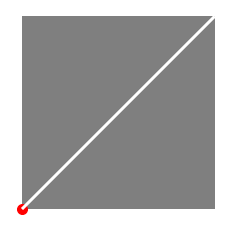

Point
LineString
Polygon


In [87]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1,y1),(x3,y3)])
polygon = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

ax = gpd.GeoSeries(polygon).plot( color='black', alpha=0.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color='white')
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)
plt.axis('off')
plt.show()
print(point.geom_type)
print(line.geom_type)
print(polygon.geom_type)

## 2. 외부데이터 활용  

### 2-1. 공간 데이터의 형태  

이제 간단 공간데이터의 타입과 생성방법을 알아봤으니, 공공데이터를 활용해보자.  

1. Point : [서울특별시 소방서 위치정보](http://data.seoul.go.kr/dataList/OA-12740/S/1/datasetView.do)
2. Polygon : [서울특별시 행정경계_법정동](http://data.nsdi.go.kr/dataset)

출처는 위 링크를 타고가면 되고, 해당 데이터는 [github reop](D:\spatial_analysis\data)에 올려두었다. 

![png](image/shape_data.png){: .align-center}

Point 좌표 데이터의 경우 csv파일로 서을시 소방안전센터의 경도와 위도 좌표를 가지고 있다.  
Polygon의 경우 GIS 데이터는 shapefile이라고 하는데 이는 하나의 파일이 아니라 3개 이상의 확장 포맷을 통틀어 부른다. `dbf`,`prj`,`shp`,`shx`의 확장자를 가지고 있다.  

이 4개의 파일은 각자의 공간정보를 담고 있어, 개별파일이 아니라 한 경로에 같이 보관되어야 한다.  

- **dbf** : dBase 데이터베이서 파일로, 데이터프레임 형태의 정보를 갖고 있다.  
- **prj** : 공간 데이터의 좌표정보(좌표계)를 갖고 있으며, 좌표정의가 되어 있지 않을 경우 이 파일이 없을 수 있다.  
- **shp** : vector 타입의 도형 및 정보를 담고 있다.  
- **shx** : shp와 마찬가지이며, Auto CAD에서 주로 활용된다.  

### 2-2. 공간데이터 시각화  

데이터를 불러와 보자.  

In [166]:
import pandas as pd

seoul_area = gpd.GeoDataFrame.from_file('data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
pt_119 = pd.read_csv('data/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', encoding='cp949', dtype=str)

In [167]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132225119 1948846.28818384, 9..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372298973 1944982.49182513, 9..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.113697057 1948605.67781751, 9..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.752991218 1940073.8549744, 95..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250437958 1944035.05375883, 9..."


In [168]:
pt_119.head()

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.8694519
1,22,1122101,신내119안전센터,37.6102463,127.0964731
2,42,1115104,서초119안전센터,37.4877727,127.0171447
3,3,1106102,이촌119안전센터,37.5278414,126.9583175
4,4,1106104,후암119안전센터,37.5448956,126.9812418


shp파일을 geopandas를 이용해서 바로 읽었을때, Geometry컬럼에 각 구에 해당하는 Polygon 정보가 들어있는 것을 확인할 수 있다.  
하지만 소방안전센터의 경우 단순 데이터프레임 이므로 위도와 경도 좌표를 이용해서 공간데이터로 만들어 주어야 한다.  

In [169]:
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')

pt_119.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.8694519 37.527161)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.0964731 37.6102463)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.0171447 37.4877727)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.9583175 37.5278414)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.9812418 37.5448956)


### 2-3. 좌표정의 및 변환   

공간데이터를 다룰때는 좌표계를 이해하는것이 상당히 중요하다.  
서로다른 데이터의 좌표계를 통일 시키거나 변환할때는, 먼저 해당 데이터가 정의된 좌표계가 어떤 것인지 알아야 한다.  

대표적으로 위경도, 미터좌표계가 있는데 국내에서는 주로 아래 좌표계를 사용한다.  

1. EPSG4326(WGS84) : 위경도, 기본좌표계  
2. EPSG5179(TM) : 미터 좌표계   
3. EPSG5174(TM) : 미터 좌표계  
4. EPSG5181(TM) : 미터 좌표계   

데이터를 받아올때 꼭 어떤 좌표계로 만들어진 데이터 인지를 확인해야 그 데이터를 활용할 수 있다(좌표계를 모르면 못쓰는 데이터라고 해도 무방하다).  

기본적으로 python이나 qgis에 내장된 각 좌표계를 사용해도 큰 문제는 없지만 보정좌표 등을 정확하게 정의해 주기 위해서는 직접 해당 좌표계를 정의해주는게 좋다(추후에 다루기로한다).  

자세한 내용은 [여기](https://www.osgeo.kr/17)를 참고  

좌표계 확인 및 정의는 `.crs`인자로, 변환은 `.to_crs`인자로 가능하다.  

In [170]:
print(seoul_area.crs)
print(pt_119.crs)

{'init': 'epsg:5179'}
None


보다시피 새로 생성한 pt_119는 아직 좌표정의가 되어 있지 않다.  
파일명처럼 좌표계는 기본 위경도 좌표인 EPSG4326죄표계라고 명시되어 있으므로 다음과 같이 정의해주자.  

In [171]:
pt_119.crs = {'init':'epsg:4326'}
print(pt_119.crs)

{'init': 'epsg:4326'}


두 데이터 모두 좌표가 정의 되었으므로, 이제 하나의 좌표로 통일 시켜보자.  
일반적으로 미터 단위를 분석을 진행해야 하기 때문에 `epsg5179`로 변환해주자.  

In [172]:
pt_119 = pt_119.to_crs({'init':'epsg:5179'})

두 데이터를 모두 시각화 하면,  

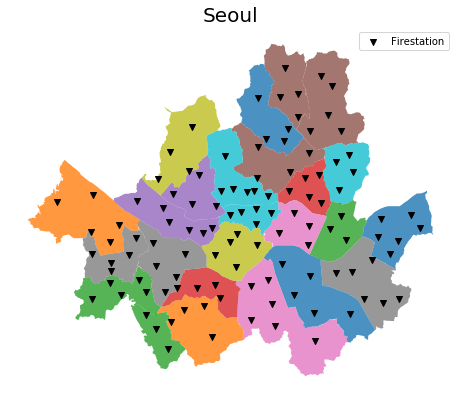

In [173]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
pt_119.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

다음 포스팅에서는 이제 공간 분석에 활용되는 `geopandas`의 다양한 function과 방법론들을 알아보자.  